In [9]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

from wordcloud import WordCloud,STOPWORDS
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [10]:
# Import dataset 

dataset=pd.read_csv('amazon_reviews_us_Apparel_v1_00.csv')
dataset

marketplace  customer_id       review_id  product_id  product_parent  \
0                US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1                US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2                US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3                US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4                US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   
...             ...          ...             ...         ...             ...   
1048570          US     32571045  R36VH1BSHPFBJP  B00L4EQKZK       952734484   
1048571          US     51355341   RN2KJ7DZSLTRV  B00L4EQKZK       952734484   
1048572          US      7235924  R2SD7QGACA9OR5  B00L4EQKZK       952734484   
1048573          US     28521590   RNWBL3HEBQ0Z0  B00L4ENS9G       572512906   
1048574          US     44584078  R16PEE44RHWPUF  B00L4ENEM2       243172666   

                                             product_title product_category  \
0        Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1        V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2        James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3        Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4        JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   
...                                                    ...              ...   
1048570  Camping For Foodies Men's Novelty T-shirt Neve...          Apparel   
1048571  Camping For Foodies Men's Novelty T-shirt Neve...          Apparel   
1048572  Camping For Foodies Men's Novelty T-shirt Neve...          Apparel   
1048573  Carter's Girls Torquoise Polka Dot 2 Piece Tan...          Apparel   
1048574  Los Angeles Kings Socks - Stanley Cup Champs 2...          Apparel   

         star_rating  helpful_votes  total_votes vine verified_purchase  \
0                  4              0            0    N                 Y   
1                  5              1            2    N                 Y   
2                  5              0            0    N                 Y   
3                  5              0            0    N                 Y   
4                  5              0            0    N                 Y   
...              ...            ...          ...  ...               ...   
1048570            5              0            0    N                 N   
1048571            5              0            0    N                 N   
1048572            5              0            0    N                 N   
1048573            4              0            0    N                 Y   
1048574            3              0            0    N                 Y   

                                           review_headline  \
0        ★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★   
1                          Favorite for winter. Very warm!   
2                               Great Socks for the money.   
3                                               Slick hat!   
4                                     I would do it again!   
...                                                    ...   
1048570                                       Great Shirt.   
1048571  nice quality. "Camping For Foodies" has world-...   
1048572                                        Great Shirt   
1048573                                     Lovely 2 piece   
1048574  They seem to fit good at my foot as I like a s...   

                                               review_body review_date  
0        These Really Do Work Great, But You Do Need To...  14-01-2013  
1        I love this dress. Absolute favorite for winte...  04-03-2014  
2        Nice socks, great colors, just enough support ...  12-07-2015  
3        I bought this for my husband and WOW, this is ...  03-06-2015  
4        Perfect dress and the customer service was awe...  12-06-2015  
...           

In [13]:
# Take only verified purchases for analysis

data=dataset.copy()
data = data[data['verified_purchase'] == 'Y']

In [14]:
# Check the null values

data.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        3
review_body          359
review_date           69
dtype: int64

In [15]:
# Handle missing reviews

data['review_body']=data['review_body'].fillna('Missing')
data['review_body']

0          These Really Do Work Great, But You Do Need To...
1          I love this dress. Absolute favorite for winte...
2          Nice socks, great colors, just enough support ...
3          I bought this for my husband and WOW, this is ...
4          Perfect dress and the customer service was awe...
                                 ...                        
1048564    This shirt is for really really really skinny ...
1048565                            cheap material runs small
1048568            Cute lil baby outfit that fit as expected
1048573    Really nice tankini for my littleone<br />Exce...
1048574    They seem to fit good at my foot as I like a s...
Name: review_body, Length: 969915, dtype: object

In [16]:
# Clean NaN values

data.fillna(0)
data

marketplace  customer_id       review_id  product_id  product_parent  \
0                US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1                US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2                US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3                US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4                US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   
...             ...          ...             ...         ...             ...   
1048564          US     22980412  R12FR72G0SZ1HZ  B00L4EU1XM        20874941   
1048565          US     17274115   RRLVI380KDBMS  B00L4ERLVC        73682466   
1048568          US     39242001  R1PYFRXKS1DS8C  B00L4EQN8E       472186507   
1048573          US     28521590   RNWBL3HEBQ0Z0  B00L4ENS9G       572512906   
1048574          US     44584078  R16PEE44RHWPUF  B00L4ENEM2       243172666   

                                             product_title product_category  \
0        Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1        V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2        James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3        Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4        JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   
...                                                    ...              ...   
1048564  Envy Boutique Women's Knitted Corset Basque La...          Apparel   
1048565  Hollywood Star Fashion Women's Semi Sheer Soli...          Apparel   
1048568  Carter's Baby Girls' 2 Piece Striped Dress Set...          Apparel   
1048573  Carter's Girls Torquoise Polka Dot 2 Piece Tan...          Apparel   
1048574  Los Angeles Kings Socks - Stanley Cup Champs 2...          Apparel   

         star_rating  helpful_votes  total_votes vine verified_purchase  \
0                  4              0            0    N                 Y   
1                  5              1            2    N                 Y   
2                  5              0            0    N                 Y   
3                  5              0            0    N                 Y   
4                  5              0            0    N                 Y   
...              ...            ...          ...  ...               ...   
1048564            1              1            1    N                 Y   
1048565            2              0            0    N                 Y   
1048568            5              0            0    N                 Y   
1048573            4              0            0    N                 Y   
1048574            3              0            0    N                 Y   

                                           review_headline  \
0        ★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★   
1                          Favorite for winter. Very warm!   
2                               Great Socks for the money.   
3                                               Slick hat!   
4                                     I would do it again!   
...                                                    ...   
1048564                               Buy at your own risk   
1048565                                          Two Stars   
1048568                                              Cute!   
1048573                                     Lovely 2 piece   
1048574  They seem to fit good at my foot as I like a s...   

                                               review_body review_date  
0        These Really Do Work Great, But You Do Need To...  14-01-2013  
1        I love this dress. Absolute favorite for winte...  04-03-2014  
2        Nice socks, great colors, just enough support ...  12-07-2015  
3        I bought this for my husband and WOW, this is ...  03-06-2015  
4        Perfect dress and the customer service was awe...  12-06-2015  
...           

In [17]:
# Merge review text and summary

data['review']=data['review_headline']+data['review_body']
data=data.drop(['review_headline', 'review_body'], axis=1)
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase review_date  \
0            4              0            0    N                 Y  14-01-2013   
1            5              1            2    N                 Y  04-03-2014   
2            5              0            0    N                 Y  12-07-2015   
3            5              0            0    N                 Y  03-06-2015   
4            5              0            0    N                 Y  12-06-2015   

                                              review  
0  ★ THESE REALLY DO WORK GREAT WITH SOME TWEAKIN...  
1  Favorite for winter. Very warm!I love this dre...  
2  Great Socks for the money.Nice socks, great co...  
3  Slick hat!I bought this for my husband and WOW...  
4  I would do it again!Perfect dress and the cust...

In [18]:
# Create a function that returns sentiment value based on the overall ratings from the user

def rating(row):
    if row['star_rating'] == 3.0:
        val = 'Neutral'
    elif row['star_rating'] == 1.0 or row['star_rating'] == 2.0:
        val = 'Negative'
    elif row['star_rating'] == 4.0 or row['star_rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [19]:
# Applying the function in our new column

data['sentiment'] = data.apply(rating, axis=1)
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase review_date  \
0            4              0            0    N                 Y  14-01-2013   
1            5              1            2    N                 Y  04-03-2014   
2            5              0            0    N                 Y  12-07-2015   
3            5              0            0    N                 Y  03-06-2015   
4            5              0            0    N                 Y  12-06-2015   

                                              review sentiment  
0  ★ THESE REALLY DO WORK GREAT WITH SOME TWEAKIN...  Positive  
1  Favorite for winter. Very warm!I love this dre...  Positive  
2  Great Socks for the money.Nice socks, great co...  Positive  
3  Slick hat!I bought this for my husband and WOW...  Positive  
4  I would do it again!Perfect dress and the cust...  Positive

In [21]:
# Generate new column 'date', 'month' and 'year' from 'review_date

new = data["review_date"].str.split("-", n = 1, expand = True)
data["date"]= new[0]
data["year"]= new[1]
new = data["year"].str.split("-", n = 1, expand = True) 
data["month"]= new[0] 
data["year"]= new[1] 
data=data.drop(['review_date'], axis=1)
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              0            0    N                 Y   
1            5              1            2    N                 Y   
2            5              0            0    N                 Y   
3            5              0            0    N                 Y   
4            5              0            0    N                 Y   

                                              review sentiment date  year  \
0  ★ THESE REALLY DO WORK GREAT WITH SOME TWEAKIN...  Positive   14  2013   
1  Favorite for winter. Very warm!I love this dre...  Positive   04  2014   
2  Great Socks for the money.Nice socks, great co...  Positive   12  2015   
3  Slick hat!I bought this for my husband and WOW...  Positive   03  2015   
4  I would do it again!Perfect dress and the cust...  Positive   12  2015   

  month  
0    01  
1    03  
2    07  
3    06  
4    06

In [22]:
# Create a cleaning function

def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
# Apply cleaning function

data['review']=data['review'].apply(lambda x:review_cleaning(x))
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              0            0    N                 Y   
1            5              1            2    N                 Y   
2            5              0            0    N                 Y   
3            5              0            0    N                 Y   
4            5              0            0    N                 Y   

                                              review sentiment date  year  \
0  ★ these really do work great with some tweakin...  Positive   14  2013   
1  favorite for winter very warmi love this dress...  Positive   04  2014   
2  great socks for the moneynice socks great colo...  Positive   12  2015   
3  slick hati bought this for my husband and wow ...  Positive   03  2015   
4  i would do it againperfect dress and the custo...  Positive   12  2015   

  month  
0    01  
1    03  
2    07  
3    06  
4    06

In [24]:
# Create stop words

stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all','★','★★','★★★', 
             ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
            '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
            '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
            '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
            '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
            '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
            '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
            'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
            '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
            '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [25]:
# Remove stopwords from the 'reviews' column

data['review'] =data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              0            0    N                 Y   
1            5              1            2    N                 Y   
2            5              0            0    N                 Y   
3            5              0            0    N                 Y   
4            5              0            0    N                 Y   

                                              review sentiment date  year  \
0  really work great tweaking ★these really work ...  Positive   14  2013   
1  favorite winter warmi love dress absolute favo...  Positive   04  2014   
2  great socks moneynice socks great colors enoug...  Positive   12  2015   
3  slick hati bought husband wow slick hat high q...  Positive   03  2015   
4  would againperfect dress customer service awesome  Positive   12  2015   

  month  
0    01  
1    03  
2    07  
3    06  
4    06

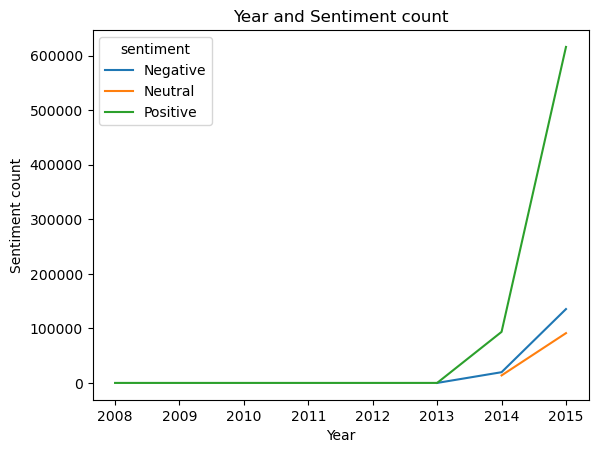

In [26]:
# Find and display the distribution of the sentiments

data.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [27]:
# Filtering data

review_pos = data[data["sentiment"]=='Positive'].dropna()
review_neu = data[data["sentiment"]=='Neutral'].dropna()
review_neg = data[data["sentiment"]=='Negative'].dropna()

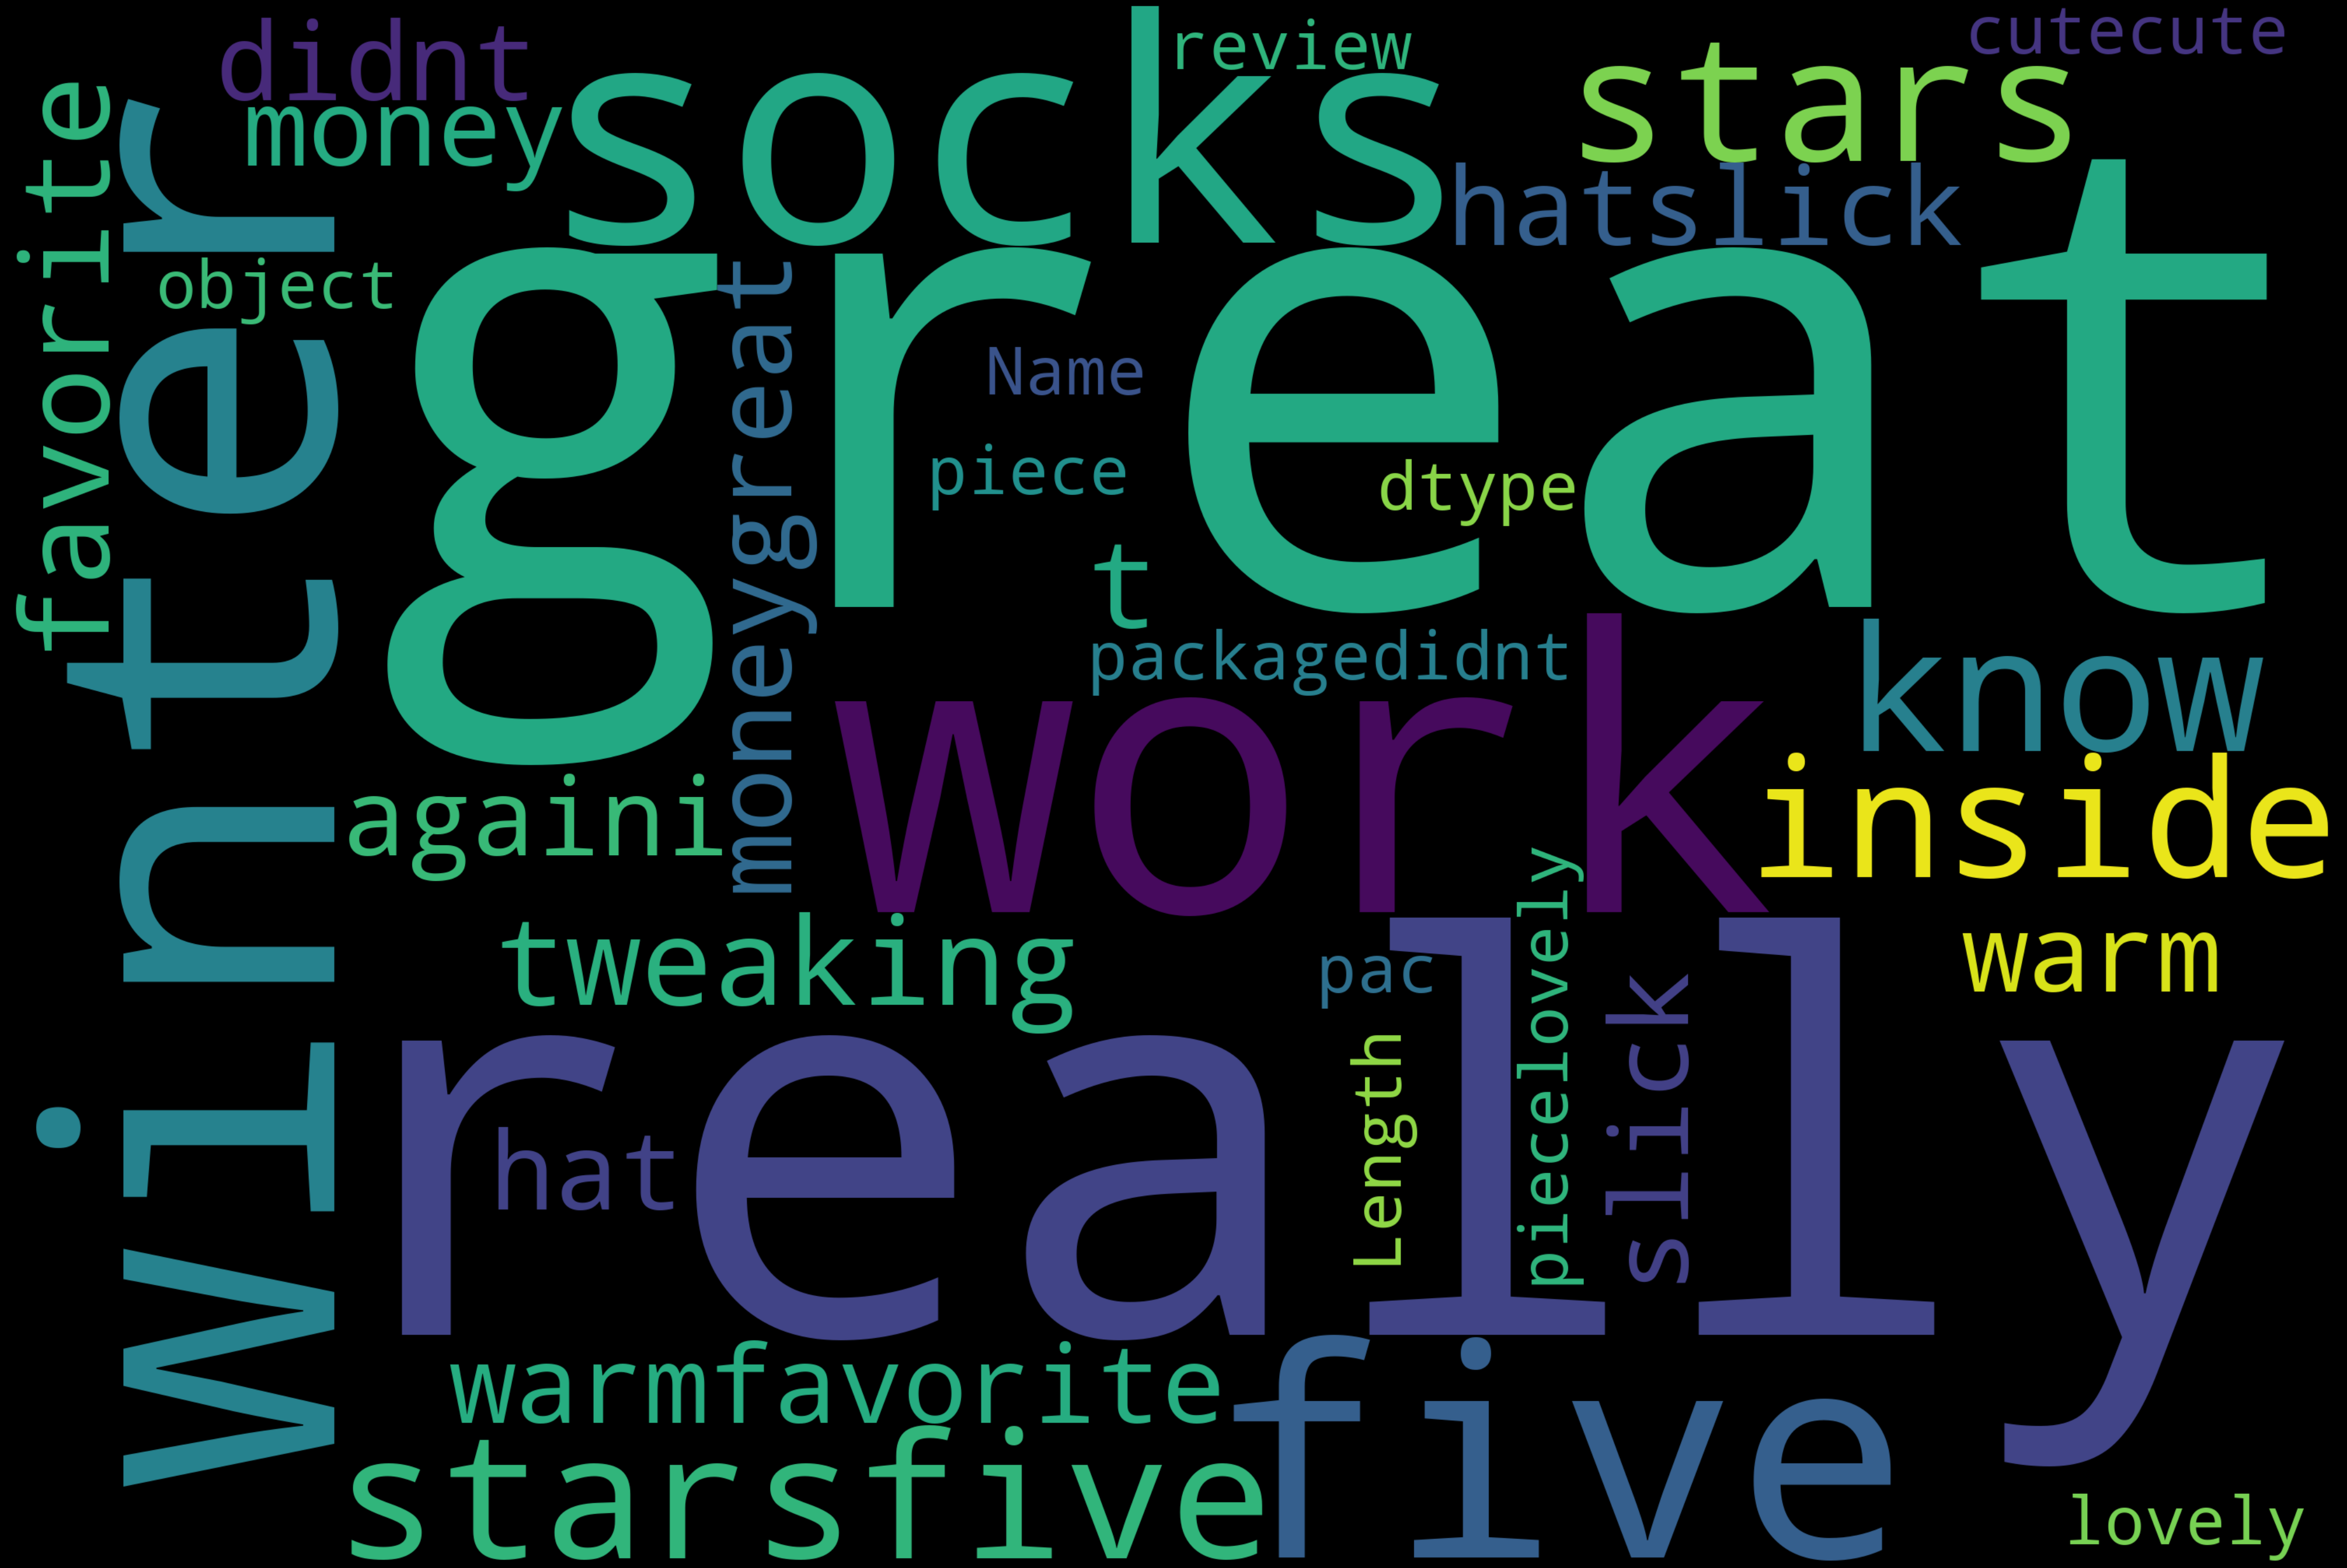

In [18]:
# Wordcloud - Positive reviews

text = review_pos["review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

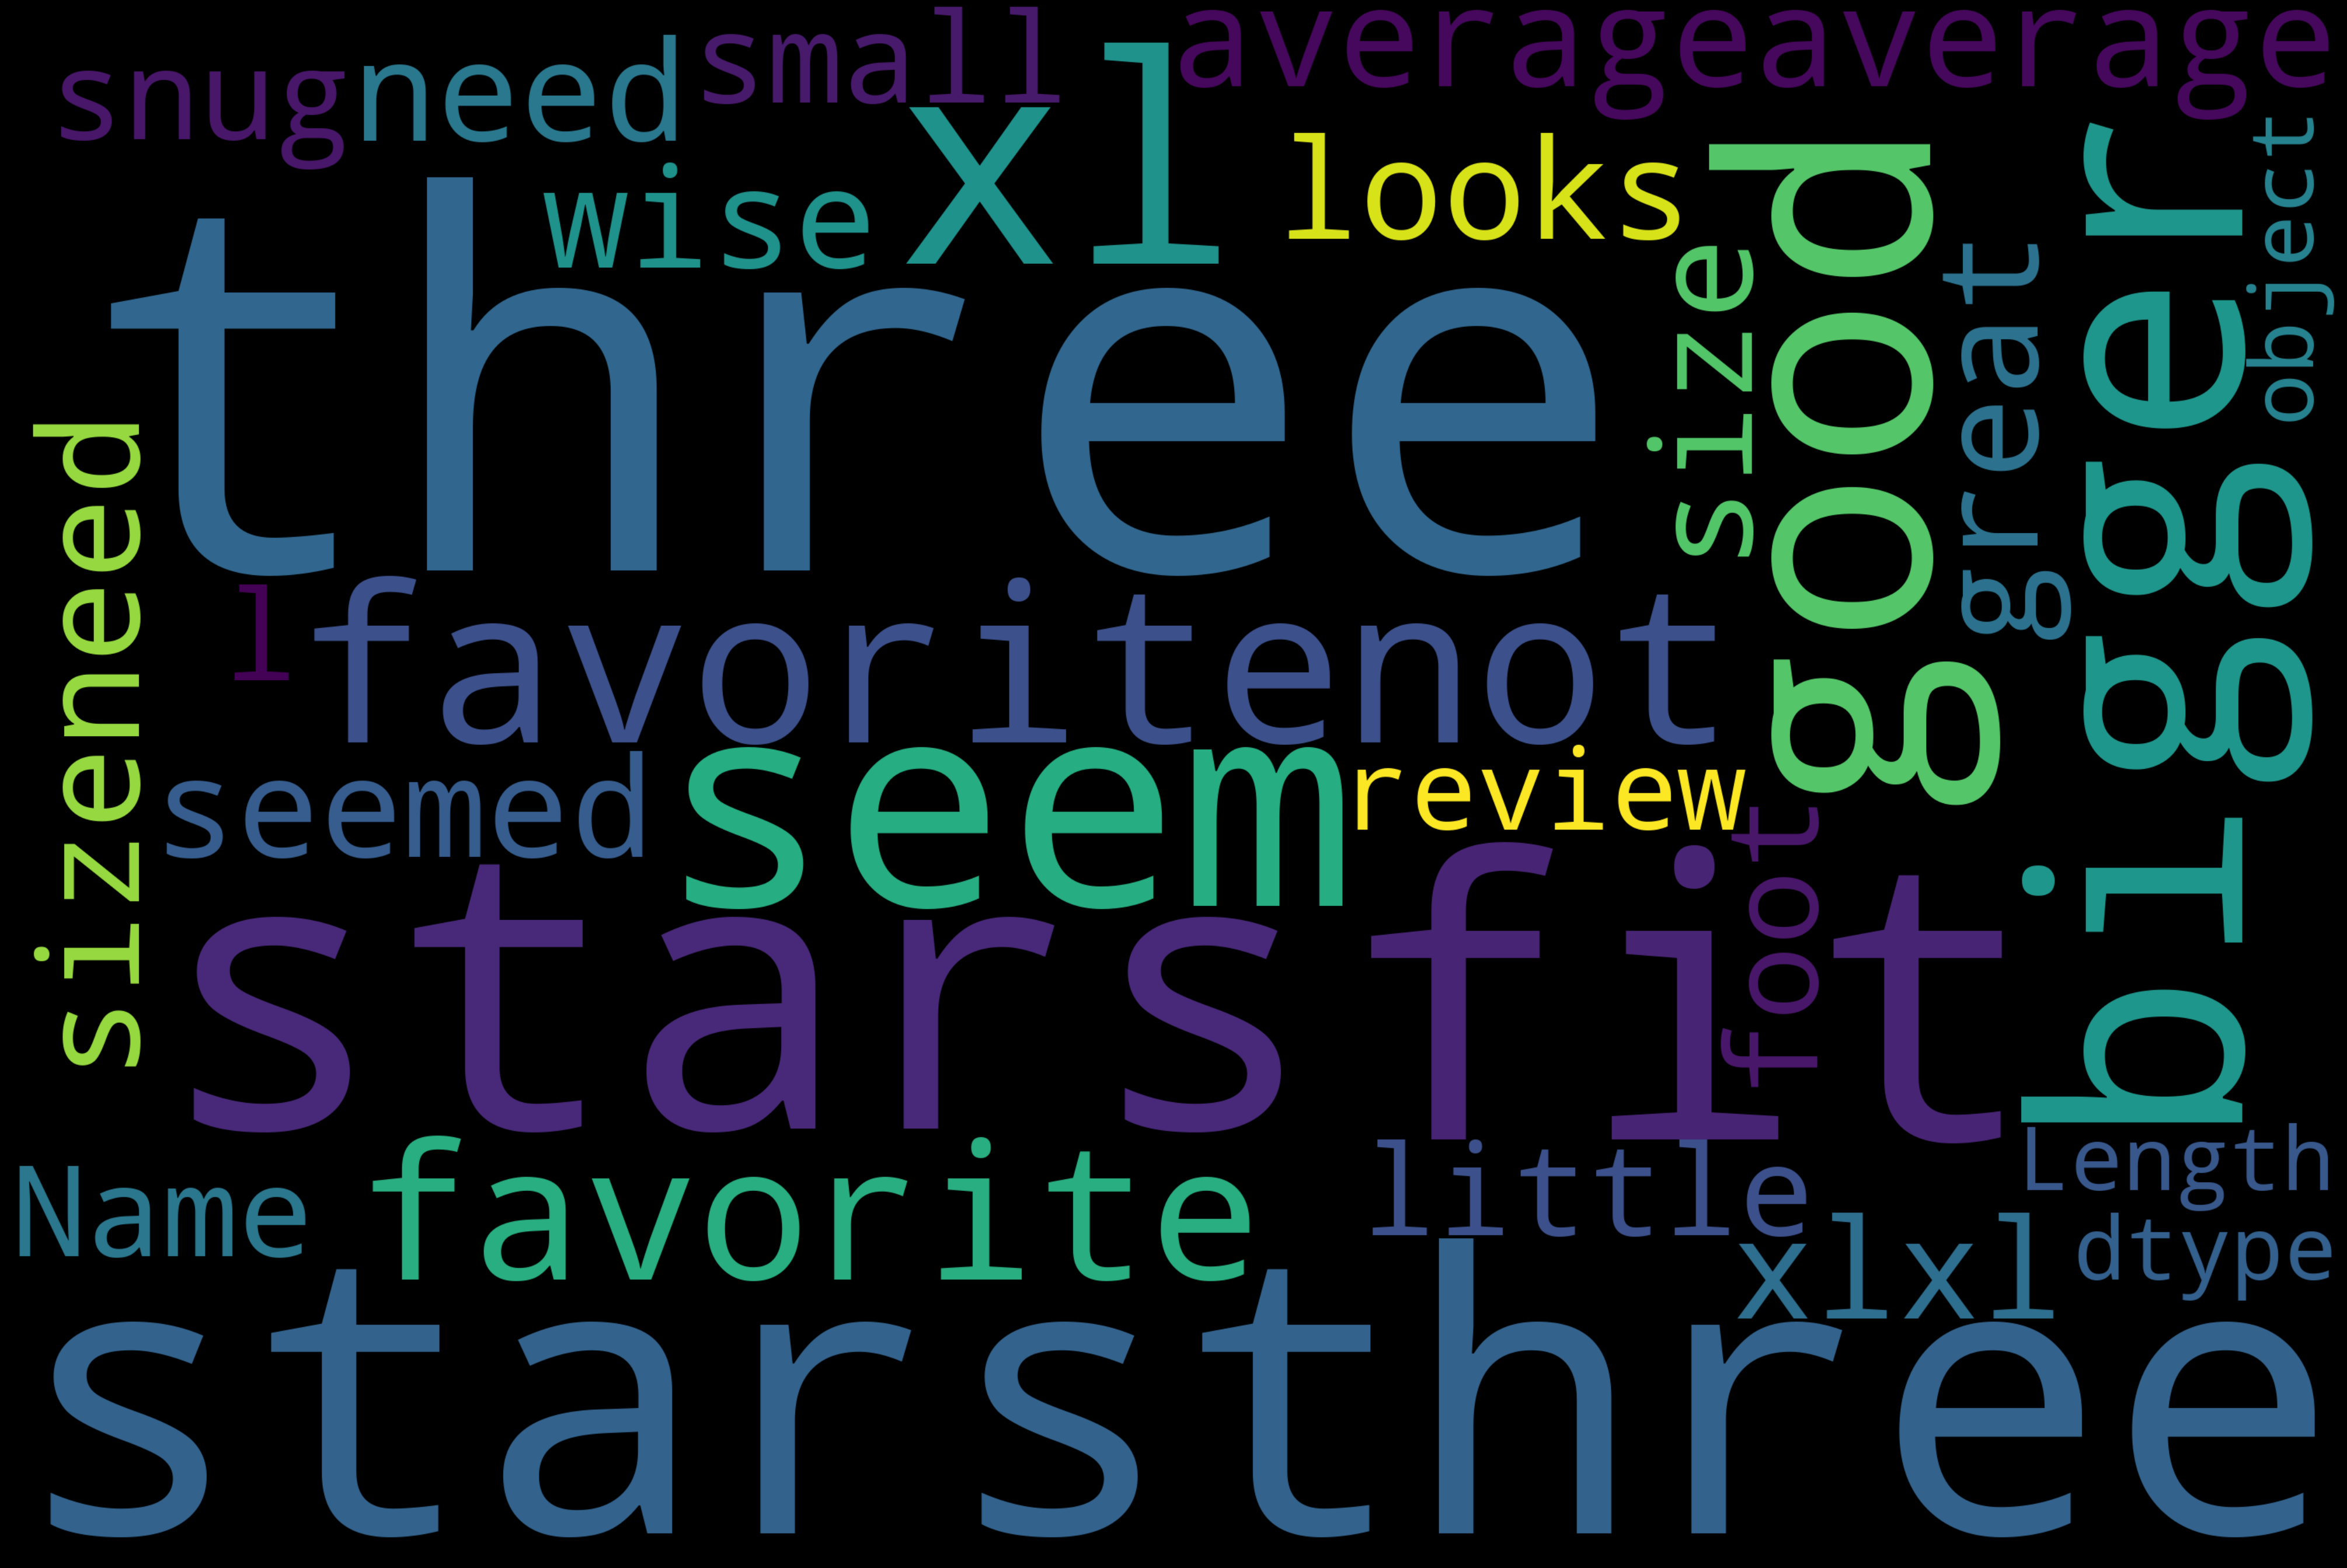

In [19]:
# Wordcloud - Neutral reviews

text = review_neu["review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

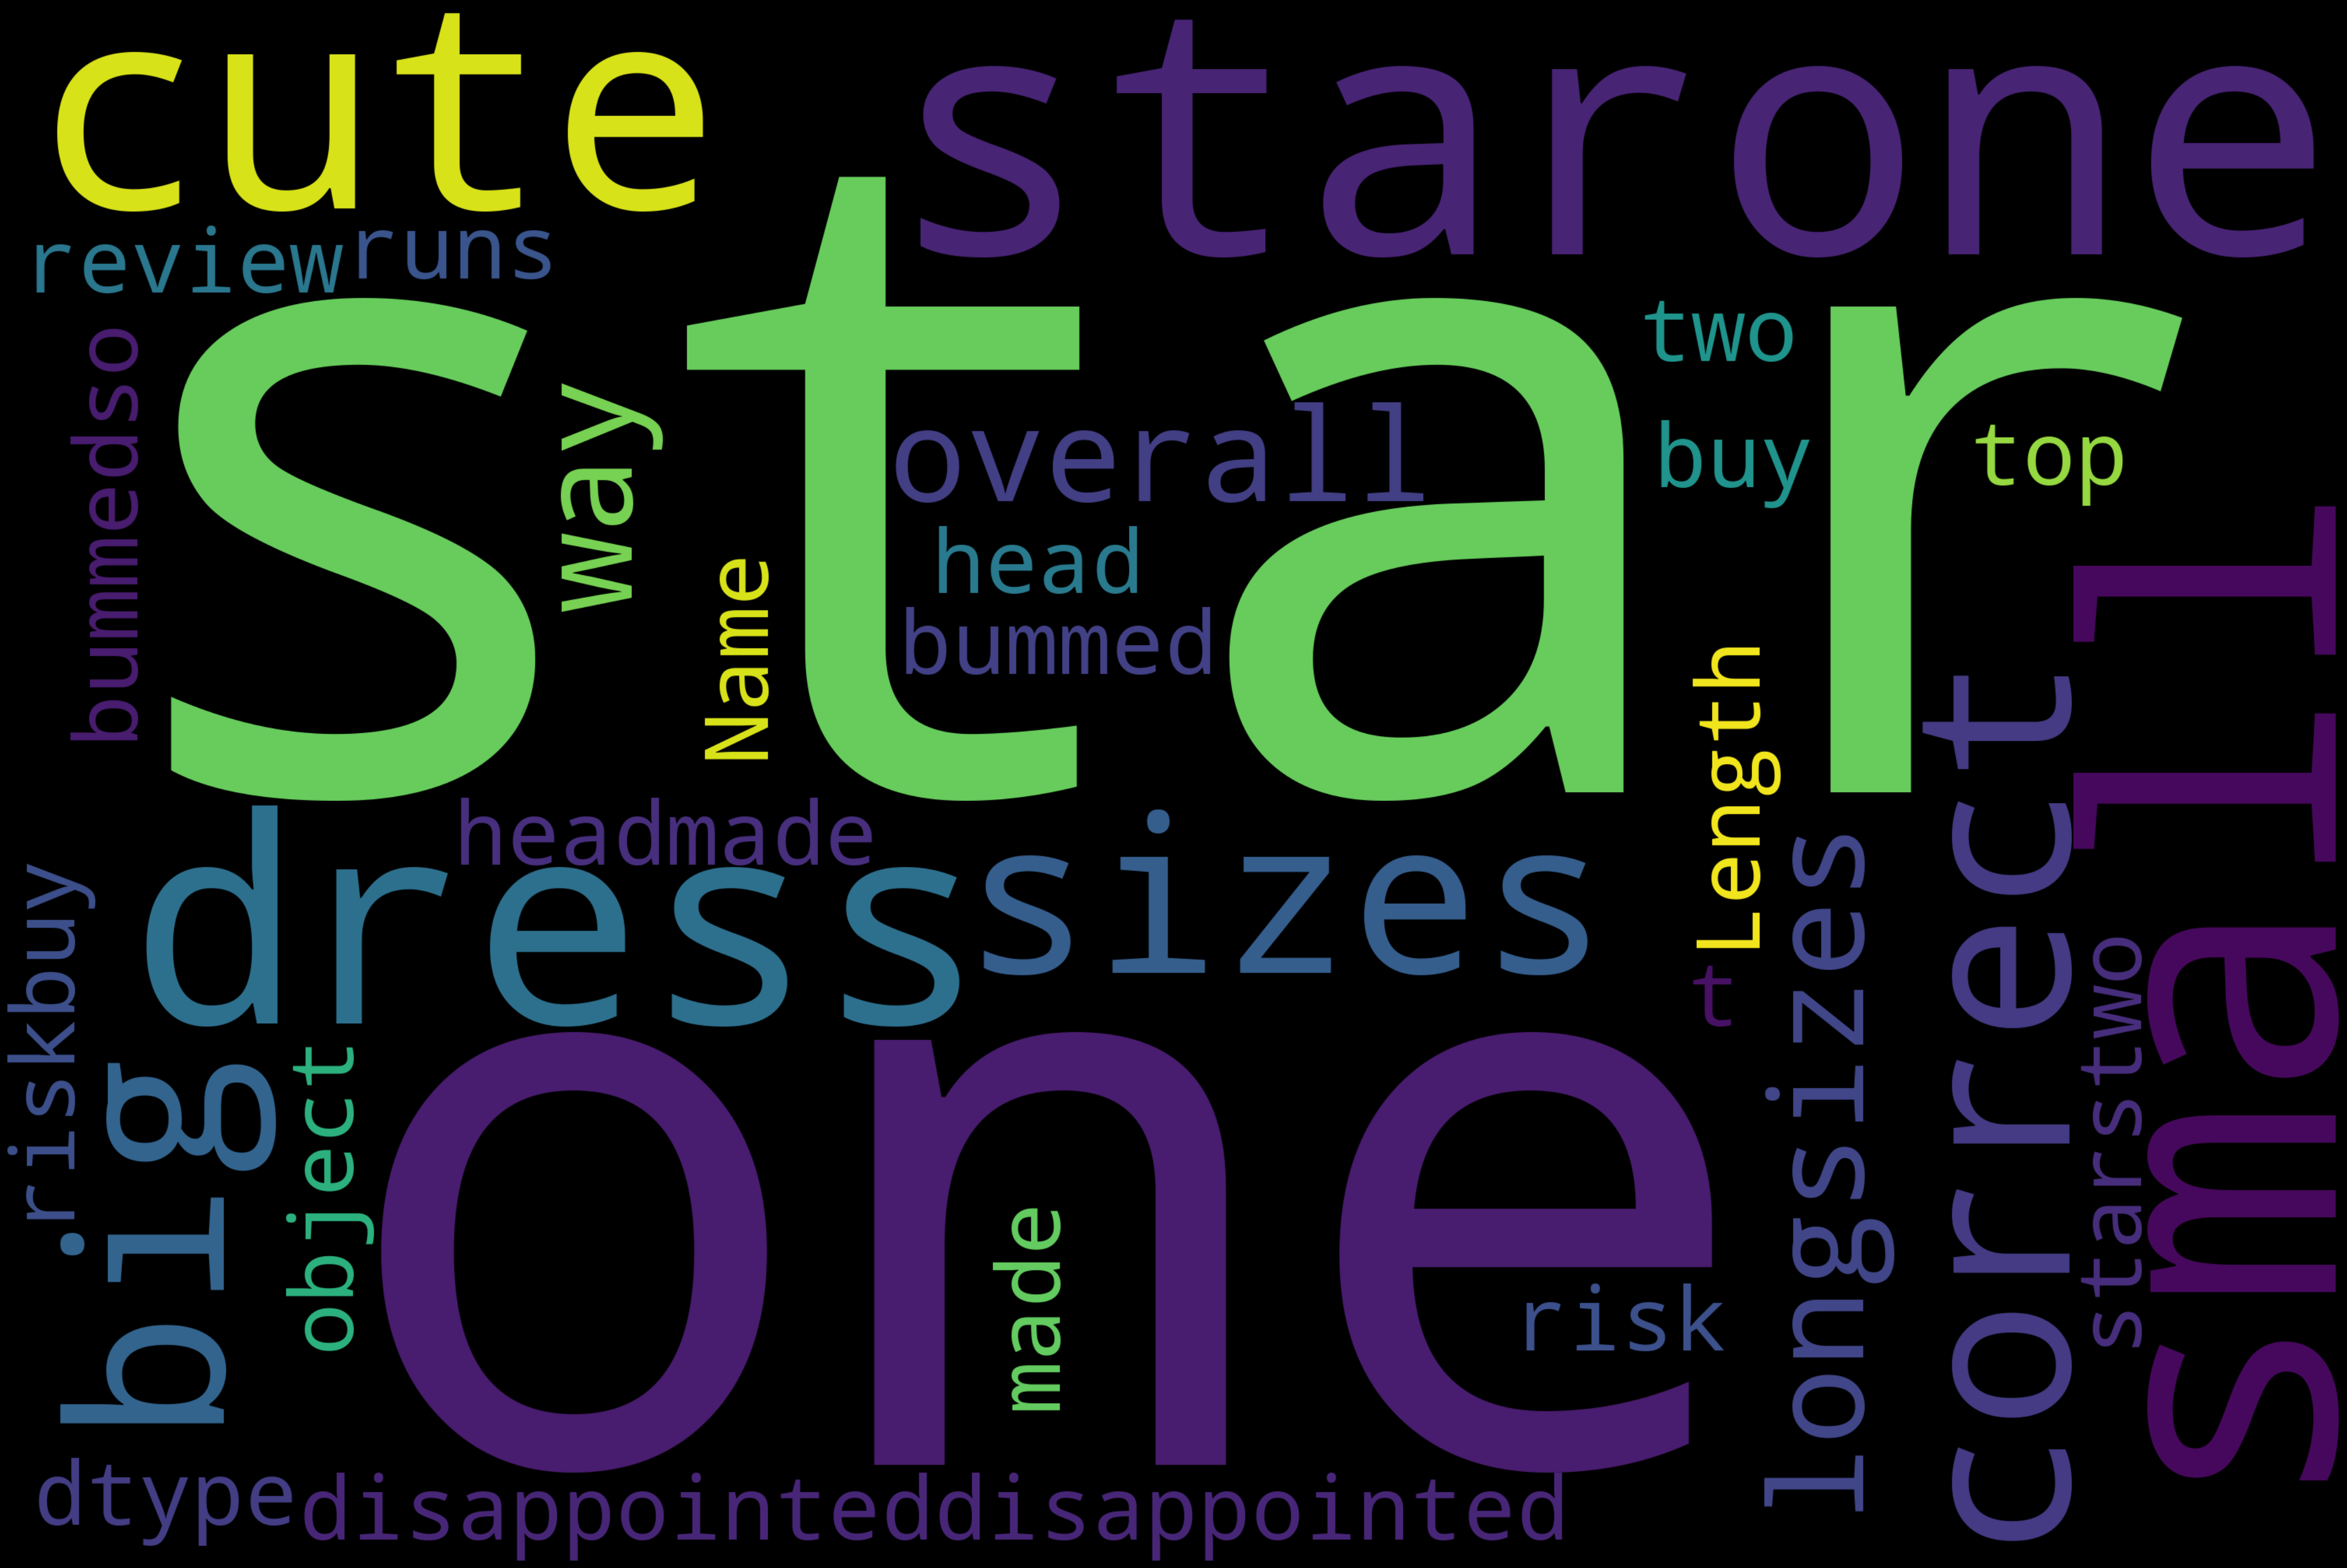

In [20]:
# Wordcloud - Negative reviews

text = review_neg["review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Encode labels in column 'sentiment'

label_encoder = preprocessing.LabelEncoder() 
data['sentiment']= label_encoder.fit_transform(data['sentiment']) 
data['sentiment'].unique()

array([2, 1, 0])

In [22]:
# Extracting 'reviews' for processing

review_features=data.copy()
review_features=review_features[['review']].reset_index(drop=True)
review_features.head()

review
0  really work great tweaking really work great t...
1           favorite winter warmfavorite winter warm
2                 great socks moneygreat socks money
3                                 slick hatslick hat
4                                 would againi would

In [23]:
# Apply TF-IDF
# Compute a weight to each word which signifies the importance of the word 

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(review_features['review'])
X.shape

(969915, 5000)

In [24]:
# Get the target variable (encoded)

y=data['sentiment']

In [25]:
# Handling Class Imbalance target feature-SMOTE


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [26]:
# Divide the dataset into Train and Test datasets


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)
X_train.shape

(1596975, 5000)

In [27]:
# Perform feature scaling

  
sc = StandardScaler(with_mean=False)
x_train = sc.fit_transform(X_train)  
x_test = sc.transform(X_test) 

In [28]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# Logistic Regression


logreg= LogisticRegression(random_state=0)  
logreg.fit(X_train, y_train) 

C:\Users\KAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [30]:
# Test Logistic Regression model

y_pred_lr= logreg.predict(X_test)

In [31]:
# Find accuracy of Logistic Regression model

print(classification_report(y_test, y_pred_lr))
score = accuracy_score(y_test, y_pred_lr)
print("Accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.60      0.88      0.72    177678
           1       0.78      0.60      0.68    177012
           2       0.88      0.68      0.77    177636

    accuracy                           0.72    532326
   macro avg       0.76      0.72      0.72    532326
weighted avg       0.76      0.72      0.72    532326

Accuracy:   0.721


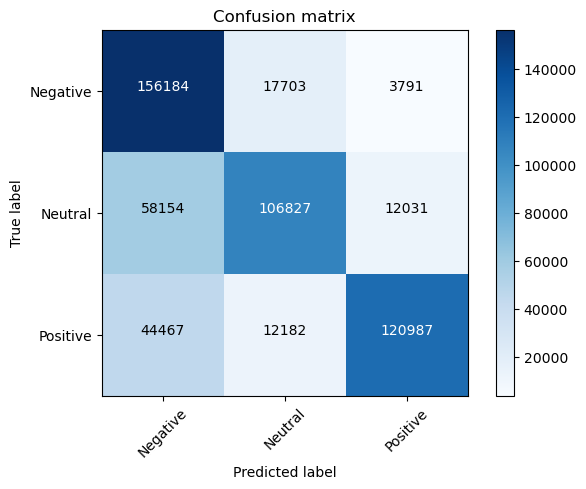

In [32]:
# Plot confusion matrix for Logistic Regression

cm = metrics.confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [33]:
# Decision Tree

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
# Test Decision Tree model

y_pred_dt = dt_classifier.predict(X_test)

In [35]:
# Find accuracy of Decision Tree model

class_report = classification_report(y_test, y_pred_dt)
print(class_report)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:   %0.3f" % accuracy)

              precision    recall  f1-score   support

           0       0.63      0.92      0.75    177678
           1       0.86      0.65      0.74    177012
           2       0.92      0.70      0.79    177636

    accuracy                           0.76    532326
   macro avg       0.80      0.76      0.76    532326
weighted avg       0.80      0.76      0.76    532326

Accuracy:   0.759


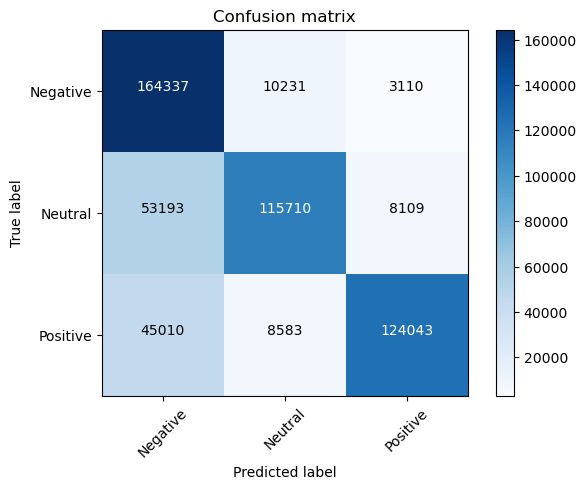

In [36]:
# Plot confusion matrix for Decision Tree

cm = metrics.confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [37]:
# KNN Classifier


knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# Test KNN model

y_pred_knn=knn.predict(X_test)

C:\Users\KAI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
# Find accuracy of KNN model

confusion_matrix(y_test, y_pred_knn) 
print(classification_report(y_test, y_pred_knn))
score = accuracy_score(y_test, y_pred_knn)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.85      0.66      0.74    177678
           1       0.58      0.88      0.70    177012
           2       0.93      0.65      0.77    177636

    accuracy                           0.73    532326
   macro avg       0.79      0.73      0.74    532326
weighted avg       0.79      0.73      0.74    532326

accuracy:   0.732


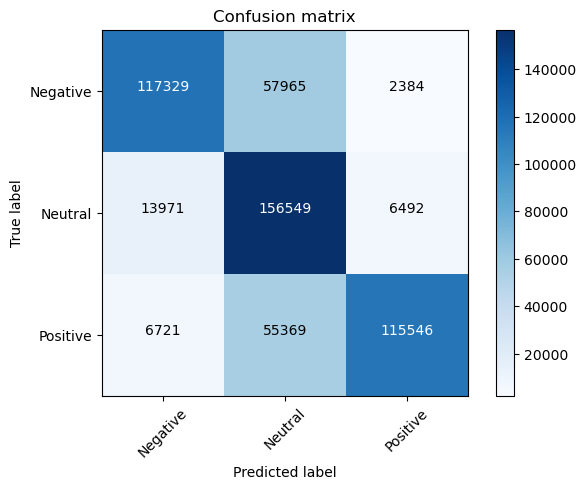

In [40]:
# Plot confusion matrix for KNN

cm = metrics.confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [41]:
# Naive Bayes classifier

gnb = BernoulliNB()
gnb.fit(X_train, y_train)

BernoulliNB()

In [42]:
# Test Naive Bayes model

y_pred_gnb=gnb.predict(X_test)

In [43]:
# Find accuracy of Naive Bayes model

print(classification_report(y_test,y_pred_gnb))
score=accuracy_score(y_test,y_pred_gnb)
print("accuracy :%0.3f" % score)

              precision    recall  f1-score   support

           0       0.60      0.88      0.71    177678
           1       0.76      0.62      0.68    177012
           2       0.91      0.66      0.76    177636

    accuracy                           0.72    532326
   macro avg       0.76      0.72      0.72    532326
weighted avg       0.76      0.72      0.72    532326

accuracy :0.720


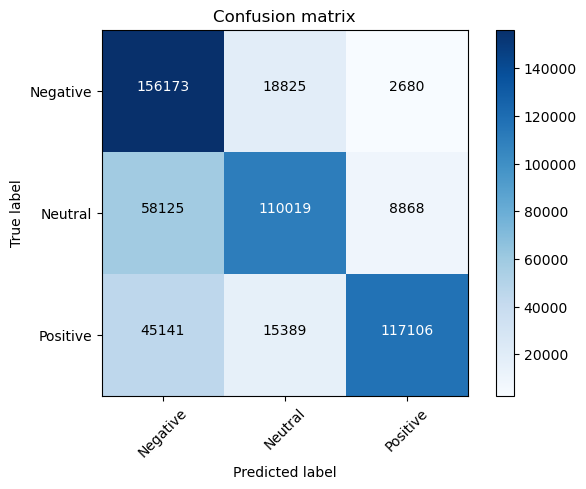

In [44]:
# Plot confusion matrix for Naive Bayes

cm = metrics.confusion_matrix(y_test, y_pred_gnb)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [45]:
# Support Vector Machine (SVM)


svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
# Test SVM model

y_pred_svm = svm_classifier.predict(X_test)

In [47]:
# Find accuracy of SVM model

class_report = classification_report(y_test, y_pred_svm)
print(class_report)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:   %0.3f" % accuracy)

              precision    recall  f1-score   support

           0       0.60      0.88      0.71    177678
           1       0.78      0.60      0.68    177012
           2       0.90      0.67      0.77    177636

    accuracy                           0.72    532326
   macro avg       0.76      0.72      0.72    532326
weighted avg       0.76      0.72      0.72    532326

Accuracy:   0.721


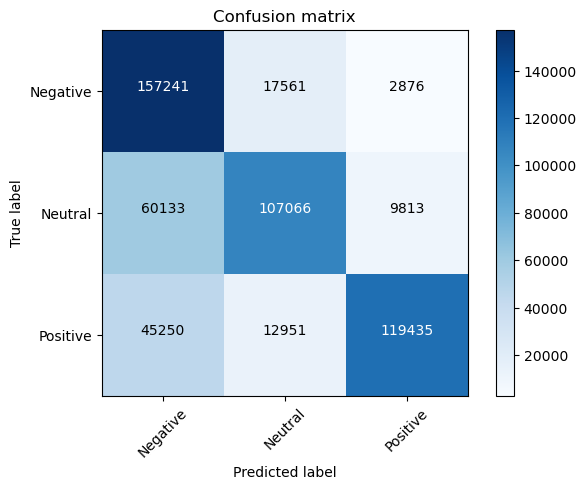

In [48]:
# Plot confusion matrix for SVM

cm = metrics.confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])